# 01. Preparing Notebook
# 02. Creating bar chart, histogram, scatterplot and linechart
# 03. Histogram of the “order_hour_of_day”
# 04. Bar chart from “loyalty_flag”
# 05. Line chart with 'prices', 'order_hour_of_day'
# 06. Line chart with 'age' 'number of dependents'
# 07. Scatterplot between 'age' and 'income'
# 08. Exporting visualizations
# 09. Saving notebook
# 10. Submitting notebooks to my tutor

## 01. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement4\Instacart Basket Analysis'

In [3]:
# importing ords_prods_cust.pkl
ords_prods_cust = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [5]:
ords_prods_cust.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 02. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

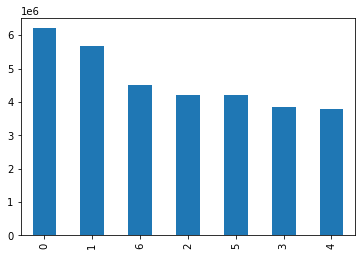

In [7]:
# creating barchart for 'order_day_of_week'
bar = ords_prods_cust['order_day_of_week'].value_counts().plot.bar()

In [10]:
# saving the chart to visualizations
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

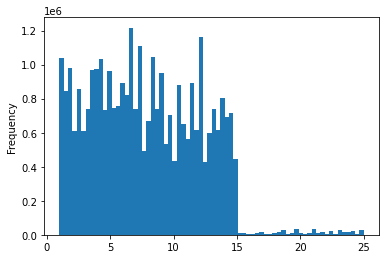

In [25]:
# creating histogram for 'order_day_of_week'
hist = ords_prods_cust['prices'].plot.hist(bins = 70)

In [30]:
# Create a list holding True/False values to the test np.random.rant() <= 0,7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [31]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [34]:
# Store 30% of the sample in the dataframe small
small = ords_prods_cust[~dev]

In [37]:
# checking if the sampling worked correctly
len(ords_prods_cust)

32404859

In [38]:
len(big) + len(small)

32404859

In [40]:
# creating df for linechart
df_2 = small[['order_day_of_week','prices']]

In [41]:
df_2.describe()

,order_day_of_week,prices
count,9.721098e+06,9.719550e+06
mean,2.738846e+00,7.789179e+00
std,2.090167e+00,4.240952e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


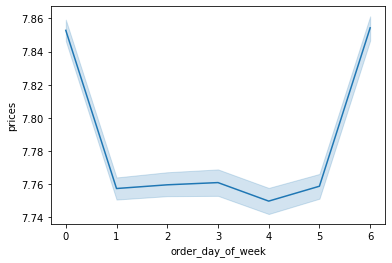

In [42]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [43]:
# saving the chart to visualizations
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','average_price_per_order_day_of_week.png'))

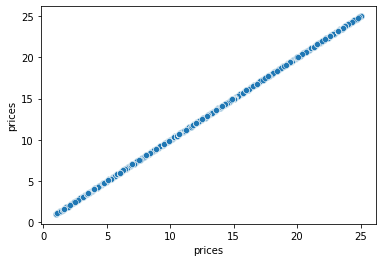

In [45]:
# creating scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [46]:
# saving the chart to visualizations
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatterplot_prices.png'))

## 03. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

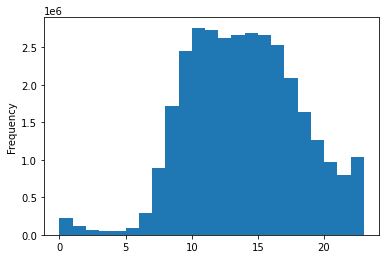

In [56]:
# creating histogram with 23 bins, because we have 23 hours in the data set
histogram_2 = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 23)

In [57]:
# saving the chart to visualizations
histogram_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','histogram_order_hour_of_day.png'))

## 03a. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

#### The histogram shows us the distribution of the number of orders per day. Most orders are from 10 am to 4 pm, and the fewest orders are from midnight to 6 am.

## 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

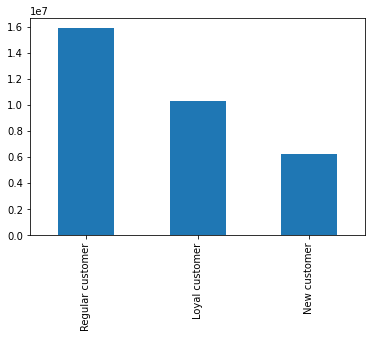

In [58]:
# creating barchart for 'loyalty_flag'
bar_2 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [59]:
# saving the chart to visualizations
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty_flag.png'))

## 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [62]:
# creating df_3 from the small sample with columns 'order_hour_of_day', 'prices'
df_3 = small[['order_hour_of_day','prices']]

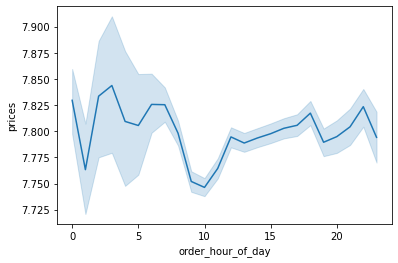

In [64]:
# creating linechart 
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [65]:
# saving the chart to visualizations
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_average_price_per_order_hour.png'))

## 06. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

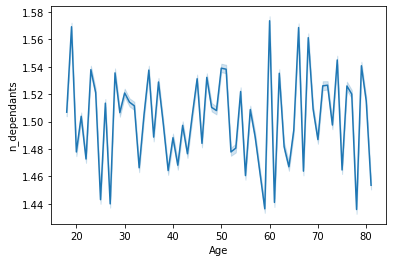

In [67]:
# creating linechart 
line_3 = sns.lineplot(data = ords_prods_cust, x = 'Age',y = 'n_dependants')

In [73]:
# checking the mean of 'n_dependants'
ords_prods_cust['n_dependants'].mean()

1.5018956570679725

In [74]:
# decriptive statistics for 'n_dependants'
ords_prods_cust['n_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [71]:
# checking max of 'n_dependants'
ords_prods_cust['n_dependants'].max()

3

In [68]:
# saving the chart to visualizations
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_age_dependants.png'))

## 06a. In a markdown cell beneath your line chart, describe what the line chart shows.

#### The number of dependents is, on average, between 1,44 and 1,58. But for all age groups. This seems a little odd, given that people over 60 also have that many dependents. How does instacart collect this number? Maybe the collection method is not suitable? It also seems odd that there is no customer with more than 3 dependents.

# 07. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

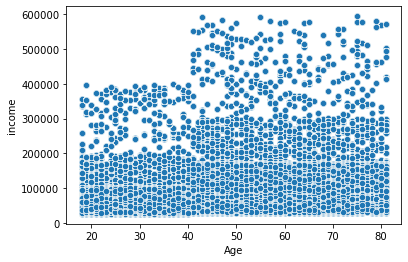

In [75]:
# creating scatterplot
scatterplot_2 = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust)

In [76]:
# saving the chart to visualizations
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter_age_income.png'))

## 07a. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

#### There is no clear relationship between age and income, but this chart shows a weird pattern that customers have more income in general with about the age 40 and above. I think this chart also shows a problem in the data or data collection method.

## 08. Export your visualizations as “.png” files in your relevant project folder.

#### I did export all visualizations during the tasks, respectively.

## 09. Save your notebook from part 2 of this Exercise’s task.

## 10. Submit your notebooks for both the first and second parts of this task to your tutor for review.